# Project Week 5
# Data Visualization and Analysis

This analysis will shed some light to any person looking to change jobs or industries

Here are the questions that will be analyzed:
1. What are the 5 Industry with the highest annual_salary_clean for Gender, Male in the age_range 35-44?
2. Is there any relationship between Industry and education_level? How about Industry with years_experience_total?
3. What is the gap by Gender and age_range between years_experience_total and years_experience_field?

Source of the data is: https://oscarbaruffa.com/messy/, named: 'Ask A Manager Salary Survey 2021 (Responses)' downloaded on April, 20th, 2022

Data cleaning performed by the author of this project

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('data_cleaning_project\Survey_clean_data.csv', sep=',')

In [3]:
data.head()

,Unnamed: 0,timestamp,age_range,age_range_encoded,industry,job_title,annual_salary,annual_salary_clean,addtl_compensation,currency,...,years_experience_total,years_experience_total_encoded,years_experience_field,years_experience_field_encoded,education_level,gender,race,day,month,year
0,0,2021-04-27 11:02:10,25-34,2,Education (Higher Education),Research and Instruction Librarian,"55,000",55000.0,0.0,USD,...,5-7 years,2,5-7 years,2,Master's degree,Woman,White,27,4,2021
1,1,2021-04-27 11:02:22,25-34,2,Computing or Tech,Change & Internal Communications Manager,"54,600",54600.0,4000.0,GBP,...,8 - 10 years,3,5-7 years,2,College degree,Non-binary,White,27,4,2021
2,2,2021-04-27 11:02:38,25-34,2,"Accounting, Banking & Finance",Marketing Specialist,"34,000",34000.0,0.0,USD,...,2 - 4 years,1,2 - 4 years,1,College degree,Woman,White,27,4,2021
3,3,2021-04-27 11:02:41,25-34,2,Nonprofits,Program Manager,"62,000",62000.0,3000.0,USD,...,8 - 10 years,3,5-7 years,2,College degree,Woman,White,27,4,2021
4,4,2021-04-27 11:02:42,25-34,2,"Accounting, Banking & Finance",Accounting Manager,"60,000",60000.0,7000.0,USD,...,8 - 10 years,3,5-7 years,2,College degree,Woman,White,27,4,2021


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27771 entries, 0 to 27770
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      27771 non-null  int64  
 1   timestamp                       27771 non-null  object 
 2   age_range                       27771 non-null  object 
 3   age_range_encoded               27771 non-null  int64  
 4   industry                        27771 non-null  object 
 5   job_title                       27771 non-null  object 
 6   annual_salary                   27771 non-null  object 
 7   annual_salary_clean             27771 non-null  float64
 8   addtl_compensation              27771 non-null  float64
 9   currency                        27771 non-null  object 
 10  country                         27771 non-null  object 
 11  us_state                        27771 non-null  object 
 12  city                            

In [5]:
# Sources are Oanda.com without addtl interbank rate on 27-Apr-2022 at 5:47 pm

currency_to_usd = ['USD', 'CAD', 'GBP', 'EUR']
fx_to_usd = [1, 1.27629, 0.78891, 0.93611 ]

In [6]:
data['annual_salary_usd'] = data.annual_salary_clean
data['annual_salary_usd'] = (
np.where(data.currency == 'GBP', data.annual_salary_usd * 0.78891, 
np.where(data.currency == 'EUR', data.annual_salary_usd * 0.93611,
np.where(data.currency == 'CAD', data.annual_salary_usd * 1.27629,
np.where(data.currency == 'USD', data.annual_salary_usd * 1,
0
)))))


In [7]:
data.head()

,Unnamed: 0,timestamp,age_range,age_range_encoded,industry,job_title,annual_salary,annual_salary_clean,addtl_compensation,currency,...,years_experience_total_encoded,years_experience_field,years_experience_field_encoded,education_level,gender,race,day,month,year,annual_salary_usd
0,0,2021-04-27 11:02:10,25-34,2,Education (Higher Education),Research and Instruction Librarian,"55,000",55000.0,0.0,USD,...,2,5-7 years,2,Master's degree,Woman,White,27,4,2021,55000.000
1,1,2021-04-27 11:02:22,25-34,2,Computing or Tech,Change & Internal Communications Manager,"54,600",54600.0,4000.0,GBP,...,3,5-7 years,2,College degree,Non-binary,White,27,4,2021,43074.486
2,2,2021-04-27 11:02:38,25-34,2,"Accounting, Banking & Finance",Marketing Specialist,"34,000",34000.0,0.0,USD,...,1,2 - 4 years,1,College degree,Woman,White,27,4,2021,34000.000
3,3,2021-04-27 11:02:41,25-34,2,Nonprofits,Program Manager,"62,000",62000.0,3000.0,USD,...,3,5-7 years,2,College degree,Woman,White,27,4,2021,62000.000
4,4,2021-04-27 11:02:42,25-34,2,"Accounting, Banking & Finance",Accounting Manager,"60,000",60000.0,7000.0,USD,...,3,5-7 years,2,College degree,Woman,White,27,4,2021,60000.000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27771 entries, 0 to 27770
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      27771 non-null  int64  
 1   timestamp                       27771 non-null  object 
 2   age_range                       27771 non-null  object 
 3   age_range_encoded               27771 non-null  int64  
 4   industry                        27771 non-null  object 
 5   job_title                       27771 non-null  object 
 6   annual_salary                   27771 non-null  object 
 7   annual_salary_clean             27771 non-null  float64
 8   addtl_compensation              27771 non-null  float64
 9   currency                        27771 non-null  object 
 10  country                         27771 non-null  object 
 11  us_state                        27771 non-null  object 
 12  city                            

# Question 1

What are the 5 Industry with the highest annual_salary_clean for Gender, Male in the age_range 35-44?

In [9]:
industry_data = data[['industry', 'gender', 'age_range', 'annual_salary_usd', 'currency']]
ind_data_to_drop = industry_data[~industry_data['currency'].isin(currency_to_usd)]
ind_data_to_drop
industry_data.drop(ind_data_to_drop.index, inplace=True)

C:\Users\52551\AppData\Local\Temp\ipykernel_23184\3084885649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_data.drop(ind_data_to_drop.index, inplace=True)


In [10]:
industry_data[industry_data['currency'].isin(currency_to_usd)].value_counts('currency')

currency
USD    23155
CAD     1655
GBP     1574
EUR      629
dtype: int64

                        annual_salary_usd
industry                                 
Law                         151783.461327
Computing or Tech           144124.432391
Health care                 119510.239615
Business or Consulting      118794.089840
Sales                       118782.184143


<AxesSubplot:xlabel='industry'>

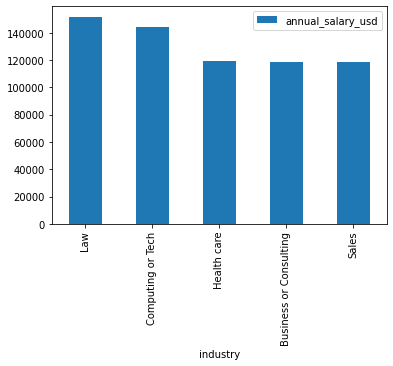

In [11]:
industry_data_man_35_44 = industry_data[(industry_data['gender'] == 'Man') & (industry_data['age_range'] == '35-44')]
print(industry_data_man_35_44.groupby('industry').mean('annual_salary_usd').nlargest(5, 'annual_salary_usd'))
industry_data_man_35_44.groupby('industry').mean('annual_salary_usd').nlargest(5, 'annual_salary_usd').plot(kind='bar')

# Question 2

Is there any relationship between Industry and education_level? How about Industry with years_experience_total?

In [92]:
question_2_education = data[['industry', 'education_level']]
question_2_education

,industry,education_level
0,Education (Higher Education),Master's degree
1,Computing or Tech,College degree
2,"Accounting, Banking & Finance",College degree
3,Nonprofits,College degree
4,"Accounting, Banking & Finance",College degree
...,...,...
27766,Engineering or Manufacturing,College degree
27767,Transport or Logistics,Master's degree
27768,Law,"Professional degree (MD, JD, etc.)"
27769,Computing or Tech,Master's degree


In [93]:
ed_level = pd.get_dummies(question_2_education.education_level)

In [94]:
ed_level.tail()

,College degree,High School,Master's degree,Not specified,PhD,"Professional degree (MD, JD, etc.)",Some college
27766,1,0,0,0,0,0,0
27767,0,0,1,0,0,0,0
27768,0,0,0,0,0,1,0
27769,0,0,1,0,0,0,0
27770,0,0,0,0,1,0,0


In [128]:
question_2_ed_level = pd.concat([question_2_education, ed_level], axis=1)
question_2_ed_level.groupby('industry').sum()

,College degree,High School,Master's degree,Not specified,PhD,"Professional degree (MD, JD, etc.)",Some college
industry,,,,,,,
"Accounting, Banking & Finance",1004.0,53.0,461.0,15.0,13.0,62.0,175.0
Art & Design,246.0,4.0,80.0,1.0,3.0,4.0,15.0
Business or Consulting,425.0,7.0,307.0,6.0,28.0,29.0,43.0
Computing or Tech,2668.0,137.0,1129.0,41.0,179.0,43.0,444.0
Education (Higher Education),633.0,16.0,1190.0,18.0,495.0,44.0,52.0
Education (Primary/Secondary),276.0,6.0,459.0,7.0,33.0,24.0,24.0
Engineering or Manufacturing,920.0,32.0,526.0,6.0,94.0,13.0,88.0
Government and Public Administration,663.0,33.0,878.0,7.0,103.0,97.0,97.0
Health care,787.0,46.0,589.0,10.0,92.0,192.0,157.0


In [105]:
question_2_experience = data[['industry', 'years_experience_total']]
question_2_experience

,industry,years_experience_total
0,Education (Higher Education),5-7 years
1,Computing or Tech,8 - 10 years
2,"Accounting, Banking & Finance",2 - 4 years
3,Nonprofits,8 - 10 years
4,"Accounting, Banking & Finance",8 - 10 years
...,...,...
27766,Engineering or Manufacturing,2 - 4 years
27767,Transport or Logistics,2 - 4 years
27768,Law,8 - 10 years
27769,Computing or Tech,8 - 10 years


In [107]:
years_exp = pd.get_dummies(data.years_experience_total)
question_2_years_exp = pd.concat([question_2_experience, years_exp], axis=1)
question_2_years_exp

,industry,years_experience_total,1 year or less,11 - 20 years,2 - 4 years,21 - 30 years,31 - 40 years,41 years or more,5-7 years,8 - 10 years
0,Education (Higher Education),5-7 years,0,0,0,0,0,0,1,0
1,Computing or Tech,8 - 10 years,0,0,0,0,0,0,0,1
2,"Accounting, Banking & Finance",2 - 4 years,0,0,1,0,0,0,0,0
3,Nonprofits,8 - 10 years,0,0,0,0,0,0,0,1
4,"Accounting, Banking & Finance",8 - 10 years,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
27766,Engineering or Manufacturing,2 - 4 years,0,0,1,0,0,0,0,0
27767,Transport or Logistics,2 - 4 years,0,0,1,0,0,0,0,0
27768,Law,8 - 10 years,0,0,0,0,0,0,0,1
27769,Computing or Tech,8 - 10 years,0,0,0,0,0,0,0,1


In [113]:
columnas = question_2_years_exp.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['industry', 'years_experience_total', '1 year or less', '11 - 20 years',
       '2 - 4 years', '21 - 30 years', '31 - 40 years', '41 years or more',
       '5-7 years', '8 - 10 years'],
      dtype='object')>

In [126]:
table_question_2_years_exp = question_2_years_exp.groupby('industry').sum()

In [127]:
table_question_2_years_exp

,1 year or less,11 - 20 years,2 - 4 years,21 - 30 years,31 - 40 years,41 years or more,5-7 years,8 - 10 years
industry,,,,,,,,
"Accounting, Banking & Finance",41.0,575.0,189.0,256.0,71.0,7.0,296.0,348.0
Art & Design,4.0,115.0,51.0,24.0,2.0,0.0,72.0,85.0
Business or Consulting,34.0,255.0,138.0,81.0,22.0,2.0,156.0,157.0
Computing or Tech,71.0,1613.0,496.0,696.0,118.0,18.0,786.0,843.0
Education (Higher Education),30.0,925.0,197.0,309.0,94.0,10.0,413.0,470.0
Education (Primary/Secondary),17.0,326.0,72.0,108.0,35.0,1.0,113.0,157.0
Engineering or Manufacturing,42.0,551.0,237.0,188.0,42.0,9.0,338.0,272.0
Government and Public Administration,20.0,700.0,167.0,268.0,81.0,7.0,298.0,337.0
Health care,52.0,648.0,189.0,264.0,74.0,11.0,283.0,352.0


# Question 3

What is the gap by Gender and age_range between years_experience_total and years_experience_field?

In [103]:
question_3 = data[['gender', 'age_range', 'years_experience_total', 'years_experience_total_encoded', 'years_experience_field', 'years_experience_field_encoded']]
question_3['gap_years_exp'] = question_3.ye

,gender,age_range,years_experience_total,years_experience_total_encoded,years_experience_field,years_experience_field_encoded
0,Woman,25-34,5-7 years,2,5-7 years,2
1,Non-binary,25-34,8 - 10 years,3,5-7 years,2
2,Woman,25-34,2 - 4 years,1,2 - 4 years,1
3,Woman,25-34,8 - 10 years,3,5-7 years,2
4,Woman,25-34,8 - 10 years,3,5-7 years,2
...,...,...,...,...,...,...
27766,Woman,25-34,2 - 4 years,1,2 - 4 years,1
27767,Man,25-34,2 - 4 years,1,8 - 10 years,3
27768,Woman,25-34,8 - 10 years,3,8 - 10 years,3
27769,Woman,25-34,8 - 10 years,3,5-7 years,2


In [134]:
data_full = pd.concat([data, years_exp, ed_level], axis=1)
data_full.to_csv('Project_week_5_data_full_clean_Survey.csv', sep=',')

In [ ]:
data_full(industry_data['gender'] == 'Man') & (industry_data['age_range'] == '35-44')

industry_data_man_35_44 = industry_data[(industry_data['gender'] == 'Man') & (industry_data['age_range'] == '35-44')]
print(industry_data_man_35_44.groupby('industry').mean('annual_salary_usd').nlargest(5, 'annual_salary_usd'))
industry_data_man_35_44.groupby('industry').mean('annual_salary_usd').nlargest(5, 'annual_salary_usd').plot(kind='bar')

In [135]:
(data_full[(data_full['gender'] == 'Man') & (data_full['age_range'] == '35-44')]).groupby('industry').mean('annual_salary_usd').nlargest(5, 'annual_salary_usd')

,Unnamed: 0,age_range_encoded,annual_salary_clean,addtl_compensation,years_experience_total_encoded,years_experience_field_encoded,day,month,year,annual_salary_usd,...,41 years or more,5-7 years,8 - 10 years,College degree,High School,Master's degree,Not specified,PhD,"Professional degree (MD, JD, etc.)",Some college
industry,,,,,,,,,,,,,,,,,,,,,
Law,16820.836735,3.0,150173.918367,18228.163265,3.510204,2.836735,25.836735,4.367347,2021.000000,151783.461327,...,0.0,0.122449,0.306122,0.040816,0.020408,0.061224,0.020408,0.020408,0.795918,0.040816
Computing or Tech,16854.766033,3.0,154987.347981,41718.820665,4.016627,3.504751,25.401425,4.264846,2021.005938,138989.357603,...,0.0,0.027316,0.090261,0.534442,0.060570,0.210214,0.008314,0.036817,0.005938,0.143705
Business or Consulting,17292.340000,3.0,121526.000000,16106.360000,3.960000,3.220000,23.720000,4.780000,2021.000000,118794.089840,...,0.0,0.020000,0.120000,0.320000,0.020000,0.500000,0.000000,0.040000,0.080000,0.040000
Sales,17973.172414,3.0,116110.344828,47224.137931,4.034483,2.965517,24.586207,4.965517,2021.000000,114686.246759,...,0.0,0.034483,0.068966,0.586207,0.068966,0.206897,0.034483,0.000000,0.000000,0.103448
Health care,14911.691176,3.0,129859.205882,20245.808824,3.808824,3.014706,24.955882,4.514706,2021.044118,114237.729044,...,0.0,0.073529,0.147059,0.279412,0.029412,0.308824,0.014706,0.088235,0.161765,0.117647
